## Notebook to make the plots required for the paper

In [1]:
from keras.models import load_model
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

figdir = '/Users/simon/Downloads/Substituent_Data/plots'

Using TensorFlow backend.
/Users/simon/.virtualenvs/termnn/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


Load the average AUC file

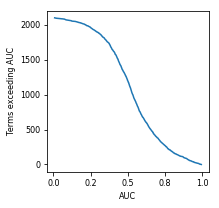

In [6]:
average_file = '/Users/simon/Downloads/Substituent_Data/filtered_average_result_with_occurences.txt'
import csv
lines = []
fontProperties = {'family':'sans-serif',
    'weight' : 'normal', 'size' : 8}
with open(average_file,'r') as f:
    reader = csv.reader(f,delimiter='\t')
    for line in reader:
        lines.append(line)
lines.sort(key = lambda x: float(x[1]),reverse = True)
auc_vals = [float(a[1]) for a in lines]
auc_vals = np.array(auc_vals)
ticks = np.arange(len(auc_vals))
plt.figure(figsize=(3.2,3.2))
ax = plt.axes([0.2,0.2,0.7,0.7])


plt.plot(auc_vals,ticks)
a = plt.gca()
a.set_xticklabels(["{:.1f}".format(b) for b in a.get_xticks()], fontProperties)
a.set_yticklabels(["{:.0f}".format(b) for b in a.get_yticks()], fontProperties)
plt.xlabel('AUC',fontProperties)
plt.ylabel('Terms exceeding AUC',fontProperties)
plt.savefig(figdir+os.sep+'term_dist.png',dpi=600)

2098
1804


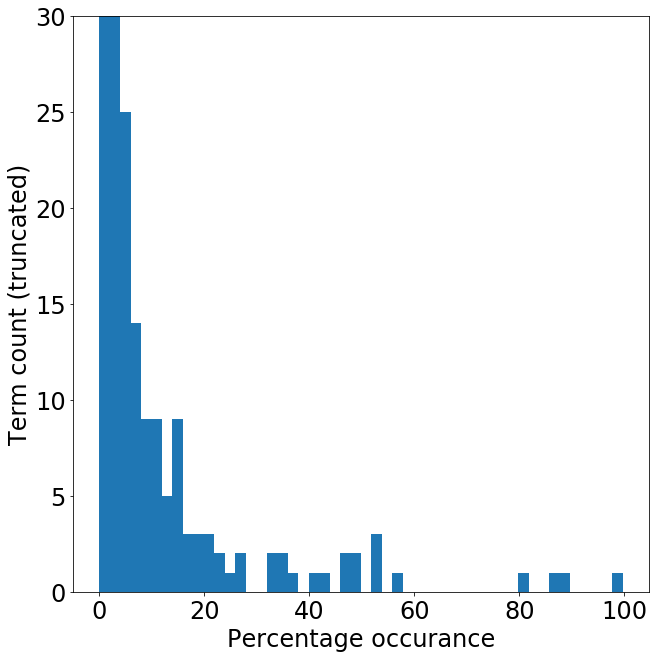

In [128]:
occ_vals = np.array([float(a[2]) for a in lines])
plt.figure(figsize=(10,10))
ax = plt.axes([0.1,0.1,0.8,0.8])
plt.hist(occ_vals,bins=50)
plt.ylim([0,30])
a = plt.gca()
a.set_xticklabels(["{:.0f}".format(b) for b in a.get_xticks()], fontProperties)
a.set_yticklabels(["{:.0f}".format(b) for b in a.get_yticks()], fontProperties)
plt.xlabel('Percentage occurance',fontProperties)
plt.ylabel('Term count (truncated)',fontProperties)
plt.savefig(figdir+os.sep+'term_freq.png')

sub = list(filter(lambda x: x<1.0,occ_vals))
print(len(occ_vals))
print(len(sub))

In [10]:
model_file = '/Users/simon/Downloads/Substituent_Data/models/AUC0.7ANDAUC0.6OCC0.5/saved_substituents_classifier_444.h5'
legend_file = '/Users/simon/Downloads/Substituent_Data/models/AUC0.7ANDAUC0.6OCC0.5/filtered_top_substituents_legend_444.txt'

Load the keras model

In [103]:
enc = load_model(model_file)
terms = []
with open(legend_file,'r') as f:
    for line in f:
        terms.append(line.strip())

In [107]:
n_bins = 1000
bin_pred = np.zeros((n_bins,n_bins))
for i in range(n_bins):
    bin_pred[i,i] = np.log(1000+1.0)
fs = enc.predict(bin_pred).T #transpose so we can iterate over terms

In [123]:
thresh = 0.25
with open(figdir + os.sep + "features.csv",'w') as f:
    writer = csv.writer(f,delimiter='\t')
    for i,term in enumerate(terms):
        pr = fs[i,:]
        binpr = list(zip(range(n_bins),pr))
        binpr.sort(key = lambda x: x[1],reverse = True)
        subbinpr = list(filter(lambda x:x[1]>=thresh,binpr))
        if len(subbinpr) == 0:
            subbinpr = binpr[:5]
        newline = [term] + subbinpr
        writer.writerow(newline)